In [24]:
import datetime
import pandas as pd
import json
import requests

# NHL API info https://github.com/Zmalski/NHL-API-Reference?tab=readme-ov-file#get-skater-stats

NHL_URL = 'https://api.the-odds-api.com/v4/sports/?apiKey=YOUR_API_KEY'
endpoint = 'wsc/game-story/'
game_id = '2023020823'


#start = datetime.date(2020, 1 ,1)

# url = f'{NHL_URL}{start:%Y-%m-%d}'
url = f'{NHL_URL}{endpoint}{game_id}'
print(f'Hitting this url: {url}')

result = requests.get(url)

Hitting this url: https://api-web.nhle.com/v1/wsc/game-story/2023020823


In [25]:
# This will print the JSON in a readable format
print(json.dumps(data, indent=4))  

{
    "id": 2023020470,
    "season": 20232024,
    "gameType": 2,
    "limitedScoring": false,
    "gameDate": "2023-12-16",
    "venue": {
        "default": "Mullett Arena"
    },
    "venueLocation": {
        "default": "Tempe"
    },
    "startTimeUTC": "2023-12-17T02:00:00Z",
    "easternUTCOffset": "-05:00",
    "venueUTCOffset": "-07:00",
    "venueTimezone": "America/Phoenix",
    "tvBroadcasts": [
        {
            "id": 28,
            "market": "A",
            "countryCode": "US",
            "network": "MSG-B",
            "sequenceNumber": 62
        },
        {
            "id": 521,
            "market": "H",
            "countryCode": "US",
            "network": "SCRIPPS",
            "sequenceNumber": 87
        }
    ],
    "gameState": "OFF",
    "gameScheduleState": "OK",
    "awayTeam": {
        "id": 7,
        "name": {
            "default": "Sabres"
        },
        "abbrev": "BUF",
        "placeName": {
            "default": "Buffalo"
        },


In [27]:
# Check if the request was successful
if result.status_code == 200:
    # Parse the JSON response
    data = result.json()
    
    # Assuming the JSON has an abbreviation and score under certain keys
    # You will need to adapt this based on the actual JSON structure
    away_abbrev = data.get('awayTeam', {}).get('abbrev', 'N/A') 
    away_score = data.get('awayTeam', {}).get('score', 'N/A')  
    home_abbrev = data.get('homeTeam', {}).get('abbrev', 'N/A')  
    home_score = data.get('homeTeam', {}).get('score', 'N/A')  
    
    print(f'Away: {away_abbrev} {away_score}')
    print(f'Home: {home_abbrev} {home_score}')
else:
    print(f"Failed to retrieve data. Status code: {result.status_code}")

Away: TBL 3
Home: BOS 2


In [20]:
# note the json gets read with the disclaimer and time outputs as well
from io import StringIO
data = StringIO(result.text)
hehe = pd.read_json(data)
hehe

,bpi,disclaimer,time
2024-09-11,57332.0971,This data was produced from the CoinDesk Bitco...,NaN
updated,NaN,This data was produced from the CoinDesk Bitco...,"Sep 12, 2024 00:03:00 UTC"
updatedISO,NaN,This data was produced from the CoinDesk Bitco...,2024-09-12T00:03:00+00:00


In [21]:
data = pd.DataFrame({'Bitcoin Price Index': jsondata['bpi']})
data

,Bitcoin Price Index
2024-09-11,57332.0971


<Axes: >

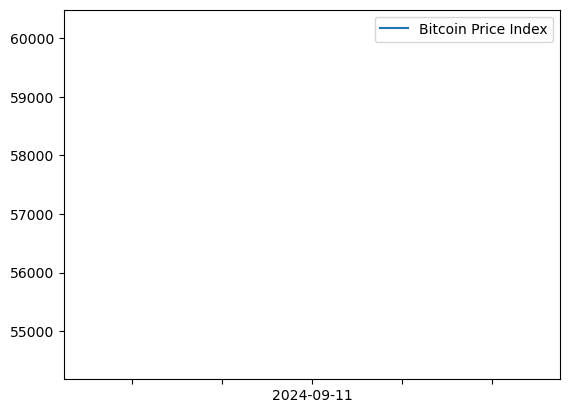

In [22]:
%matplotlib inline
data.plot()